In [472]:
# Importação e configuração
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc, roc_auc_score
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 200)

pd.options.display.float_format = '{:.2f}'.format
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['lines.linestyle'] = '--'
mpl.rcParams['lines.marker'] = 'o'
mpl.rcParams['lines.markersize'] = 6
mpl.rcParams['lines.markerfacecolor'] = 'blue'
mpl.rcParams['lines.markeredgewidth'] = 1.5
mpl.rcParams['lines.markeredgecolor'] = 'black'

In [368]:
# Carregando arquivo Csv
df = pd.read_csv('base_case.csv', sep='\t')

# Avaliando o conjunto de dados de forma macro

In [369]:
# Visualizar os Primeiros Registros
df.head()

,index,alvo,REF_DATE,PRODUTO,DIAS_ATRASO,col_4,col_5,col_6,col_7,col_8,col_9,col_10,col_11,col_12,col_13,col_14,col_15,col_16,col_17,col_18,col_19,col_20,col_21,col_22,col_23,col_24,col_25,col_26,col_27,col_28,col_29,col_30,col_31,col_32,col_33,col_34,col_35,col_36,col_37,col_38,col_39,col_40,col_41,col_42,col_43,col_44,col_45,col_46,col_47,col_48,col_49,col_50,col_51,col_52,col_53,col_54,col_55,col_56,col_57,col_58,col_59,col_60,col_61,col_62,col_63,col_64,col_65,col_66,col_67,col_68,col_69,col_70,col_71,col_72,col_73,col_74,col_75,col_76,col_77,col_78,col_79,col_80,col_81,col_82,col_83,col_84,col_85,col_86,col_87,col_88,col_89,col_90,col_91,col_92,col_93,col_94,col_95,col_96,col_97,col_98,col_99,col_100,col_101,col_102,col_103,col_104,col_105,col_106,col_107,col_108,col_109,col_110,col_111,col_112,col_113,col_114,col_115,col_116,col_117,col_118,col_119,col_120,col_121,col_122,col_123,col_124,col_125,col_126,col_127,col_128,col_129,col_130,col_131,col_132,col_133,col_134,col_135,col_136,col_137,col_138,col_139,col_140,col_141,col_142,col_143,col_144,col_145,col_146,col_147,col_148,col_149,col_150,col_151,col_152,col_153,col_154,col_155,col_156,col_157,col_158,col_159,col_160,col_161,col_162,col_163,col_164,col_165,col_166,col_167,col_168,col_169,col_170,col_171,col_172,col_173,col_174,col_175,col_176,col_177,col_178,col_179,col_180,col_181,col_182,col_183,col_184,col_185,col_186,col_187,col_188,col_189,col_190,col_191,col_192,col_193,col_194,col_195,col_196,col_197,col_198,col_199,col_200,REGIAO
0,0,0,2023-01-31,CREDITO PESSOAL,52,2461.11,30 a 60,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0.00,0.00,2.00,2.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,A,A,C,C,A,A,A,A,0,1,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,7,44.65,7.65,44.65,7.65,NaN,NaN,18.50,NaN,INDEFINIDO,INDEFINIDO,INDEFINIDO,NaN,NaN,NaN,4,0,0,0,7,4,0,0,0,7,6,0,0,0,9,0.00,NaN,0.00,0.00,NaN,SEM APROVACAO,SEM PASSAGEM,SEM APROVACAO,SEM APROVACAO,SEM PASSAGEM,S,N,44.65,NaN,N,N,VAREJO,S,35.70,N,VAREJO-BANCOS,N,NaN,N,APROV:S - NOVASOLIC:S - SOLICMESMOLOCAL:N,APROV:N - NOVASOLIC:N - SOLICMESMOLOCAL:N,0,0,0,0.00,SEM INFORMACAO,0.00,0,FUNDAMENTAL COMPLETO,BASICO,0,1.00,0,0,1,E,0,NaN,NaN,0,0,DE 25 A 39 ANOS,Y,NaN,0,0,0,0,0,0,2,NaN,MEDIO,NaN,3.00,-1.00,1.00,URBANO,NORTE
1,1,0,2022-12-29,CREDITO PESSOAL,37,4674.50,30 a 60,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00,0.00,0.00,0.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,A,A,A,C,A,A,A,C,1,1,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,7,41.61,15.47,41.61,15.47,31.82,30.66,6.50,0.60,INDEFINIDO,INDEFINIDO,INDEFINIDO,INDEFINIDO,INDEFINIDO,INDEFINIDO,3,2,0,0,7,3,2,0,0,7,3,2,0,0,7,NaN,NaN,0.67,0.67,NaN,SEM PASSAGEM,SEM PASSAGEM,SEM PASSAGEM,SEM PASSAGEM,SEM PASSAGEM,S,S,15.47,30.66,N,N,VAREJO,N,NaN,N,NaN,N,NaN,N,APROV:S - NOVASOLIC:N - SOLICMESMOLOCAL:N,APROV:S - NOVASOLIC:N - SOLICMESMOLOCAL:N,0,0,0,0.00,2 A 4 SM,1.00,1,SUPERIOR INCOMPLETO,MEDIO,0,1.00,0,0,1,D,0,NaN,NaN,0,0,DE 25 A 39 ANOS,Y,NaN,0,1,0,0,0,0,4,D,MEDIO,D,2.00,1.00,1.00,URBANO,NORDESTE
2,2,0,2023-09-29,CREDITO PESSOAL,36,43649.17,30 a 60,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,B,B,B,B,A,A,A,A,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,5,69.55,0.82,69.55,0.82,50.62,50.62,4.00,NaN,INDEFINIDO,INDEFINIDO,INDEFINIDO,INDEFINIDO,INDEFINIDO,INDEFINIDO,2,2,0,0,6,2,2,0,0,6,2,2,0,0,6,1.00,NaN,NaN,1.00,NaN,ALTA,SEM PASSAGEM,SEM PASSAGEM,ALTA,SEM PASSAGEM,S,S,0.82,50.62,S,N,BANCOS,N,NaN,N,NaN,N,NaN,N,APROV:S - NOVASOLIC:N - SOLICMESMOLOCAL:N,APROV:S - NOVASOLIC:N - SOLICMESMOLOCAL:N,1,0,0,0.00,4 A 10 SM,1.00,1,SUPERIOR COMPLETO,ALTO,1,4.00,1,0,1,D,0,NaN,NaN,

In [370]:
# Verificando quantidade de linhas e colunas
df.shape

(46522, 203)

In [371]:
# Resumo Estatístico dos Dados
df.describe()

,index,alvo,DIAS_ATRASO,col_4,col_6,col_7,col_8,col_9,col_10,col_11,col_12,col_13,col_14,col_15,col_16,col_17,col_18,col_19,col_20,col_21,col_22,col_23,col_24,col_25,col_26,col_27,col_28,col_29,col_30,col_31,col_32,col_33,col_34,col_35,col_36,col_37,col_38,col_39,col_40,col_41,col_42,col_43,col_44,col_45,col_46,col_47,col_48,col_49,col_50,col_51,col_52,col_53,col_54,col_55,col_56,col_57,col_58,col_59,col_60,col_61,col_62,col_63,col_64,col_65,col_66,col_67,col_68,col_69,col_70,col_71,col_72,col_73,col_74,col_75,col_76,col_77,col_78,col_87,col_88,col_89,col_90,col_91,col_92,col_93,col_94,col_95,col_96,col_97,col_98,col_99,col_100,col_101,col_102,col_103,col_104,col_105,col_106,col_107,col_108,col_109,col_110,col_111,col_112,col_113,col_114,col_115,col_116,col_123,col_124,col_125,col_126,col_127,col_128,col_129,col_130,col_131,col_132,col_133,col_134,col_135,col_136,col_137,col_138,col_139,col_140,col_141,col_142,col_150,col_151,col_156,col_160,col_164,col_165,col_166,col_167,col_169,col_170,col_173,col_174,col_175,col_176,col_177,col_179,col_182,col_183,col_187,col_188,col_189,col_190,col_191,col_192,col_193,col_197,col_198,col_199
count,46522.00,46522.00,46522.00,46522.00,46522.00,46522.00,46522.00,46522.00,46522.00,46522.00,46522.00,46522.00,46522.00,46522.00,46522.00,46522.00,46522.00,46522.00,46522.00,46522.00,46522.00,46522.00,46522.00,46522.00,46522.00,46522.00,46522.00,46522.00,46522.00,46522.00,46522.00,46522.00,46522.00,46522.00,46522.00,46522.00,46522.00,46522.00,46522.00,46522.00,46522.00,46522.00,46522.00,46522.00,46522.00,46522.00,46522.00,46522.00,46522.00,41769.00,41769.00,41769.00,41769.00,41769.00,41769.00,41769.00,41769.00,41769.00,41769.00,41769.00,41769.00,41769.00,41769.00,41769.00,41769.00,41769.00,41769.00,41769.00,41769.00,41769.00,41769.00,41769.00,41769.00,41769.00,41769.00,41769.00,41769.00,46522.00,46522.00,46522.00,46522.00,46522.00,46522.00,46522.00,46522.00,46522.00,46522.00,46522.00,46522.00,46522.00,46522.00,46522.00,46522.00,46522.00,46522.00,46522.00,46522.00,46522.00,46522.00,42989.00,42989.00,41712.00,41712.00,14311.00,14311.00,37003.00,11520.00,46522.00,46522.00,46522.00,46522.00,46522.00,46522.00,46522.00,46522.00,46522.00,46522.00,46522.00,46522.00,46522.00,46522.00,46522.00,20881.00,22587.00,18812.00,34945.00,10828.00,30530.00,11692.00,19311.00,3302.00,46522.00,46522.00,46522.00,45979.00,40402.00,46522.00,46522.00,45979.00,46522.00,46522.00,46522.00,46522.00,46522.00,46522.00,46522.00,46522.00,46522.00,46522.00,46522.00,46522.00,46522.00,42393.00,42374.00,43038.00
mean,23260.50,0.13,45.23,5705.32,0.27,0.00,0.00,0.00,0.02,0.14,0.00,0.00,0.17,0.60,0.01,0.00,0.00,0.03,0.27,0.00,0.00,0.30,1.10,0.01,0.00,0.00,0.06,0.53,0.00,0.00,0.51,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.60,1.20,2.21,0.87,2.01,4.35,7.69,0.29,0.63,1.31,2.59,0.18,0.51,1.26,2.16,0.40,0.87,1.77,2.94,0.23,0.47,1.02,2.35,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.27,0.52,0.74,0.00,0.19,0.41,0.01,0.34,0.02,0.00,0.01,0.02,0.73,0.00,0.27,0.01,0.00,0.00,0.01,0.17,0.72,4.43,46.18,8.67,43.58,10.25,36.27,14.15,7.28,5.28,2.64,0.68,0.01,0.03,5.04,3.09,0.81,0.01,0.03,5.64,3.80,1.07,0.01,0.04,6.65,0.20,0.59,0.62,0.49,0.64,10.13,14.87,3.57,8.01,0.32,0.00,0.04,0.07,0.26,0.17,0.22,0.75,0.12,0.00,0.54,0.07,0.00,0.02,0.41,0.09,0.04,0.19,0.00,0.00,2.43,2.94,-0.80,0.69
std,13429.89,0.33,8.36,14505.09,0.62,0.06,0.00,0.01,0.13,0.60,0.00,0.03,0.51,0.97,0.09,0.00,0.01,0.18,0.82,0.00,0.04,0.69,1.31,0.11,0.01,0.05,0.23,1.23,0.01,0.05,0.91,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.14,1.67,2.35,2.99,4.97,8.62,13.94,1.52,2.14,3.47,6.58,0.66,1.28,2.39,3.33,2.29,3.80,6.47,10.08,1.05,1.65,2.79,5.46,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.07,0.44,0.50,0.44,0.00,0.39,0.49,0.11,0.47,0.14,0.00,0.11,0.14,0.45,0.06,0.44,0.08,0.00,0.00,0.08,0.38,0.45,2.75,24.28,11.69,24.82,13.24,20.63,15.26,9.55,6.62,2.15,1.24,0.08,0.17,3.36,2.60,1.49,0.08,0.18,3.90,3.17,1.95,0.09,0.20,4.66,0.34,0.43,0.39,0.38,0.37,1

In [372]:
# Verificar o tipo de dados de cada variável
df.dtypes

index            int64
alvo             int64
REF_DATE        object
PRODUTO         object
DIAS_ATRASO      int64
                ...   
col_197        float64
col_198        float64
col_199        float64
col_200         object
REGIAO          object
Length: 203, dtype: object

In [373]:
# Verificando quantidade de cada tipo dentro do dataframe 
df.dtypes.value_counts()

int64      103
float64     52
object      48
Name: count, dtype: int64

In [374]:
# Verificando informações do arquivo
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46522 entries, 0 to 46521
Columns: 203 entries, index to REGIAO
dtypes: float64(52), int64(103), object(48)
memory usage: 72.1+ MB


# Pré-Processamento

#### Passos que foram seguidos:
- Agrupamento de dados
- Remoção
- Binarização de dados
- Padronização
- One-Hot-Encoder (Processo de transformar os dados categoricos strings em dados numericos)

  ### Lidando com dados vazios e nulos

In [375]:
# Mapeamento para criar a nova coluna 'alvo_label'
mapeamento_descricao = {1: 'Mau Pagador', 0: 'Bom Pagador'}

# Aplicando o mapeamento para criar a nova coluna 'alvo_label'
df['alvo_label'] = df['alvo'].map(mapeamento_descricao)
df

,index,alvo,REF_DATE,PRODUTO,DIAS_ATRASO,col_4,col_5,col_6,col_7,col_8,col_9,col_10,col_11,col_12,col_13,col_14,col_15,col_16,col_17,col_18,col_19,col_20,col_21,col_22,col_23,col_24,col_25,col_26,col_27,col_28,col_29,col_30,col_31,col_32,col_33,col_34,col_35,col_36,col_37,col_38,col_39,col_40,col_41,col_42,col_43,col_44,col_45,col_46,col_47,col_48,col_49,col_50,col_51,col_52,col_53,col_54,col_55,col_56,col_57,col_58,col_59,col_60,col_61,col_62,col_63,col_64,col_65,col_66,col_67,col_68,col_69,col_70,col_71,col_72,col_73,col_74,col_75,col_76,col_77,col_78,col_79,col_80,col_81,col_82,col_83,col_84,col_85,col_86,col_87,col_88,col_89,col_90,col_91,col_92,col_93,col_94,col_95,col_96,col_97,col_98,col_99,col_100,col_101,col_102,col_103,col_104,col_105,col_106,col_107,col_108,col_109,col_110,col_111,col_112,col_113,col_114,col_115,col_116,col_117,col_118,col_119,col_120,col_121,col_122,col_123,col_124,col_125,col_126,col_127,col_128,col_129,col_130,col_131,col_132,col_133,col_134,col_135,col_136,col_137,col_138,col_139,col_140,col_141,col_142,col_143,col_144,col_145,col_146,col_147,col_148,col_149,col_150,col_151,col_152,col_153,col_154,col_155,col_156,col_157,col_158,col_159,col_160,col_161,col_162,col_163,col_164,col_165,col_166,col_167,col_168,col_169,col_170,col_171,col_172,col_173,col_174,col_175,col_176,col_177,col_178,col_179,col_180,col_181,col_182,col_183,col_184,col_185,col_186,col_187,col_188,col_189,col_190,col_191,col_192,col_193,col_194,col_195,col_196,col_197,col_198,col_199,col_200,REGIAO,alvo_label
0,0,0,2023-01-31,CREDITO PESSOAL,52,2461.11,30 a 60,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0.00,0.00,2.00,2.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,A,A,C,C,A,A,A,A,0,1,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,7,44.65,7.65,44.65,7.65,NaN,NaN,18.50,NaN,INDEFINIDO,INDEFINIDO,INDEFINIDO,NaN,NaN,NaN,4,0,0,0,7,4,0,0,0,7,6,0,0,0,9,0.00,NaN,0.00,0.00,NaN,SEM APROVACAO,SEM PASSAGEM,SEM APROVACAO,SEM APROVACAO,SEM PASSAGEM,S,N,44.65,NaN,N,N,VAREJO,S,35.70,N,VAREJO-BANCOS,N,NaN,N,APROV:S - NOVASOLIC:S - SOLICMESMOLOCAL:N,APROV:N - NOVASOLIC:N - SOLICMESMOLOCAL:N,0,0,0,0.00,SEM INFORMACAO,0.00,0,FUNDAMENTAL COMPLETO,BASICO,0,1.00,0,0,1,E,0,NaN,NaN,0,0,DE 25 A 39 ANOS,Y,NaN,0,0,0,0,0,0,2,NaN,MEDIO,NaN,3.00,-1.00,1.00,URBANO,NORTE,Bom Pagador
1,1,0,2022-12-29,CREDITO PESSOAL,37,4674.50,30 a 60,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00,0.00,0.00,0.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,A,A,A,C,A,A,A,C,1,1,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,7,41.61,15.47,41.61,15.47,31.82,30.66,6.50,0.60,INDEFINIDO,INDEFINIDO,INDEFINIDO,INDEFINIDO,INDEFINIDO,INDEFINIDO,3,2,0,0,7,3,2,0,0,7,3,2,0,0,7,NaN,NaN,0.67,0.67,NaN,SEM PASSAGEM,SEM PASSAGEM,SEM PASSAGEM,SEM PASSAGEM,SEM PASSAGEM,S,S,15.47,30.66,N,N,VAREJO,N,NaN,N,NaN,N,NaN,N,APROV:S - NOVASOLIC:N - SOLICMESMOLOCAL:N,APROV:S - NOVASOLIC:N - SOLICMESMOLOCAL:N,0,0,0,0.00,2 A 4 SM,1.00,1,SUPERIOR INCOMPLETO,MEDIO,0,1.00,0,0,1,D,0,NaN,NaN,0,0,DE 25 A 39 ANOS,Y,NaN,0,1,0,0,0,0,4,D,MEDIO,D,2.00,1.00,1.00,URBANO,NORDESTE,Bom Pagador
2,2,0,2023-09-29,CREDITO PESSOAL,36,43649.17,30 a 60,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,B,B,B,B,A,A,A,A,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,5,69.55,0.82,69.55,0.82,50.62,50.62,4.00,NaN,INDEFINIDO,INDEFINIDO,INDEFINIDO,INDEFINIDO,INDEFINIDO,INDEFINIDO,2,2,0,0,6,2,2,0,0,6,2,2,0,0,6,1.00,NaN,NaN,1.00,NaN,ALTA,SEM PASSAGEM,SEM PASSAGEM,ALTA,SEM PASSAGEM,S,S,0.82,50.62,S,N,BANCOS,N,NaN,N,NaN,N,NaN,N,APROV:S - NOVASOLIC:N - SOLICMESMOLOCAL:N,APROV:S - NOVASOLIC:N - SOLICMESMOLOCAL:N,1,0,0,0.00,4 A 10 SM,1.00,1,SUPERIOR COMP

In [376]:
# Verificando a presença de dados nulos
df.isnull().sum()

index             0
alvo              0
REF_DATE          0
PRODUTO           0
DIAS_ATRASO       0
               ... 
col_198        4148
col_199        3484
col_200        4859
REGIAO         4653
alvo_label        0
Length: 204, dtype: int64

In [377]:
df.head()

,index,alvo,REF_DATE,PRODUTO,DIAS_ATRASO,col_4,col_5,col_6,col_7,col_8,col_9,col_10,col_11,col_12,col_13,col_14,col_15,col_16,col_17,col_18,col_19,col_20,col_21,col_22,col_23,col_24,col_25,col_26,col_27,col_28,col_29,col_30,col_31,col_32,col_33,col_34,col_35,col_36,col_37,col_38,col_39,col_40,col_41,col_42,col_43,col_44,col_45,col_46,col_47,col_48,col_49,col_50,col_51,col_52,col_53,col_54,col_55,col_56,col_57,col_58,col_59,col_60,col_61,col_62,col_63,col_64,col_65,col_66,col_67,col_68,col_69,col_70,col_71,col_72,col_73,col_74,col_75,col_76,col_77,col_78,col_79,col_80,col_81,col_82,col_83,col_84,col_85,col_86,col_87,col_88,col_89,col_90,col_91,col_92,col_93,col_94,col_95,col_96,col_97,col_98,col_99,col_100,col_101,col_102,col_103,col_104,col_105,col_106,col_107,col_108,col_109,col_110,col_111,col_112,col_113,col_114,col_115,col_116,col_117,col_118,col_119,col_120,col_121,col_122,col_123,col_124,col_125,col_126,col_127,col_128,col_129,col_130,col_131,col_132,col_133,col_134,col_135,col_136,col_137,col_138,col_139,col_140,col_141,col_142,col_143,col_144,col_145,col_146,col_147,col_148,col_149,col_150,col_151,col_152,col_153,col_154,col_155,col_156,col_157,col_158,col_159,col_160,col_161,col_162,col_163,col_164,col_165,col_166,col_167,col_168,col_169,col_170,col_171,col_172,col_173,col_174,col_175,col_176,col_177,col_178,col_179,col_180,col_181,col_182,col_183,col_184,col_185,col_186,col_187,col_188,col_189,col_190,col_191,col_192,col_193,col_194,col_195,col_196,col_197,col_198,col_199,col_200,REGIAO,alvo_label
0,0,0,2023-01-31,CREDITO PESSOAL,52,2461.11,30 a 60,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0.00,0.00,2.00,2.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,A,A,C,C,A,A,A,A,0,1,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,7,44.65,7.65,44.65,7.65,NaN,NaN,18.50,NaN,INDEFINIDO,INDEFINIDO,INDEFINIDO,NaN,NaN,NaN,4,0,0,0,7,4,0,0,0,7,6,0,0,0,9,0.00,NaN,0.00,0.00,NaN,SEM APROVACAO,SEM PASSAGEM,SEM APROVACAO,SEM APROVACAO,SEM PASSAGEM,S,N,44.65,NaN,N,N,VAREJO,S,35.70,N,VAREJO-BANCOS,N,NaN,N,APROV:S - NOVASOLIC:S - SOLICMESMOLOCAL:N,APROV:N - NOVASOLIC:N - SOLICMESMOLOCAL:N,0,0,0,0.00,SEM INFORMACAO,0.00,0,FUNDAMENTAL COMPLETO,BASICO,0,1.00,0,0,1,E,0,NaN,NaN,0,0,DE 25 A 39 ANOS,Y,NaN,0,0,0,0,0,0,2,NaN,MEDIO,NaN,3.00,-1.00,1.00,URBANO,NORTE,Bom Pagador
1,1,0,2022-12-29,CREDITO PESSOAL,37,4674.50,30 a 60,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00,0.00,0.00,0.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,A,A,A,C,A,A,A,C,1,1,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,7,41.61,15.47,41.61,15.47,31.82,30.66,6.50,0.60,INDEFINIDO,INDEFINIDO,INDEFINIDO,INDEFINIDO,INDEFINIDO,INDEFINIDO,3,2,0,0,7,3,2,0,0,7,3,2,0,0,7,NaN,NaN,0.67,0.67,NaN,SEM PASSAGEM,SEM PASSAGEM,SEM PASSAGEM,SEM PASSAGEM,SEM PASSAGEM,S,S,15.47,30.66,N,N,VAREJO,N,NaN,N,NaN,N,NaN,N,APROV:S - NOVASOLIC:N - SOLICMESMOLOCAL:N,APROV:S - NOVASOLIC:N - SOLICMESMOLOCAL:N,0,0,0,0.00,2 A 4 SM,1.00,1,SUPERIOR INCOMPLETO,MEDIO,0,1.00,0,0,1,D,0,NaN,NaN,0,0,DE 25 A 39 ANOS,Y,NaN,0,1,0,0,0,0,4,D,MEDIO,D,2.00,1.00,1.00,URBANO,NORDESTE,Bom Pagador
2,2,0,2023-09-29,CREDITO PESSOAL,36,43649.17,30 a 60,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,B,B,B,B,A,A,A,A,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,5,69.55,0.82,69.55,0.82,50.62,50.62,4.00,NaN,INDEFINIDO,INDEFINIDO,INDEFINIDO,INDEFINIDO,INDEFINIDO,INDEFINIDO,2,2,0,0,6,2,2,0,0,6,2,2,0,0,6,1.00,NaN,NaN,1.00,NaN,ALTA,SEM PASSAGEM,SEM PASSAGEM,ALTA,SEM PASSAGEM,S,S,0.82,50.62,S,N,BANCOS,N,NaN,N,NaN,N,NaN,N,APROV:S - NOVASOLIC:N - SOLICMESMOLOCAL:N,APROV:S - NOVASOLIC:N - SOLICMESMOLOCAL:N,1,0,0,0.00,4 A 10 SM,1.00,1,SUPERIOR COMP

In [378]:
# Lista de colunas que irão ser dividas
columns = ['col_162', 'col_163']
suffixes = {'col_162': '', 'col_163': '_1'}

# Para cada coluna selecionada o codigo vai executar o loop
for column in columns:
    # Separando a coluna com chave e valor
    split_data = df[column].str.split(' - ')
    
    # Definição das novas colunas
    aprov = []
    novasolic = []
    solicmesmolocal = []
    
    # Interando os valores em suas respectivas colunas 
    for row in split_data:
        for item in row:
            key, value = item.split(':')
            if key == 'APROV':
                aprov.append(value)
            elif key == 'NOVASOLIC':
                novasolic.append(value)
            elif key == 'SOLICMESMOLOCAL':
                solicmesmolocal.append(value)
    
    # Criando novo dataframe com os dados extraidos do loop
    new_df = pd.DataFrame({'APROV' + suffixes[column]: aprov, 
                               'NOVASOLIC' + suffixes[column]: novasolic, 
                               'SOLICMESMOLOCAL' + suffixes[column]: solicmesmolocal})
            
    # Concatenando os novos dados  
    df = pd.concat([df, new_df], axis=1)

# Removendo as colunas com dados aglutinados
df.drop(columns=columns, inplace=True)

In [379]:
# Removendo colunas que só tem um valor unico
for column in df.columns.tolist():
    unique_count = df[column].nunique()
    if unique_count == 1:
        df = df.drop(columns=column)

In [380]:
# Agrupamentos junto com as instruções do proximo passo a ser feito com os dados

cols_clear_obj = [] # Prontos para fazer OHE (One Hot Encoder)
cols_not_clear_obj = [] # Tratar para poder fazer o OHE

cols_clear_float = [] # Prontos para o modelo
cols_not_clear_float = [] # Tratar para o modelo

cols_clear_int = [] # Prontos para o modelo
cols_not_clear_int = []  # Tratar para o modelo

cols_to_remove = []  # Dados que nao vai afetar siginifcativamente o mdoelo
cols_bin = []

for col in df.columns:
   
    null_count = df[col].isnull().sum()
    
    # Agrupando dados com mais de 50% de dados nulos
    if (df[col].isnull().sum() / df.shape[0]) * 100 > 50:
        cols_to_remove.append(col)
        continue
        
    # Agrupando dados limpos binarios
    if df[col].nunique() == 2 and df[col].dtype == 'O':
        cols_bin.append(col)
        
    # Agrupando dados limpos que são do tipo objeto
    if null_count == 0 and df[col].dtype == 'object':
        cols_clear_obj.append(col)

    # Agrupando dados sujos do tipo objeto
    elif null_count > 0 and df[col].dtype == 'object':
        cols_not_clear_obj.append(col)
        
    # Agrupando dados limpos que são do tipo float64
    if null_count == 0 and df[col].dtype == 'float64':
        cols_clear_float.append(col)
    # Agrupando dados sujos do tipo float64
    elif null_count > 0 and df[col].dtype == 'float64':
        cols_not_clear_float.append(col)
        
    # Agrupando dados limpos que são do tipo int64
    if null_count == 0 and df[col].dtype == 'int64':
        cols_clear_int.append(col)
    # Agrupando dados sujos do tipo int64
    elif null_count > 0 and df[col].dtype == 'int64':
        cols_not_clear_int.append(col)

In [381]:
# Mapeamento para binarizar 'S' como 1 e 'N' como 0
mapeamento_binarizacao = {'S': 1, 'N': 0}
cols_bin.remove('alvo_label')
# Aplicando a binarização às colunas
for col in cols_bin:
        df[col] = df[col].map(mapeamento_binarizacao)

### Removendo Colunas

- Colunas que tem mais de 50% de dados ausentes
- removendo colunas com valor unico

In [382]:
# Remoção de dados que tem mais de 27 mil de vazios (aproximadamente 50% de dados nulos)
df = df.drop(columns=cols_to_remove)

In [383]:
# Preenchendo valores nulos em colunas do tipo objeto com 'INDEFINIDO'
df[cols_not_clear_obj] = df[cols_not_clear_obj].fillna('INDEFINIDO')

# Preenchendo valores nulos em colunas do tipo int64 com a média
for col in cols_not_clear_int:
    mean_value = df[col].mean()
    df[col] = df[col].fillna(mean_value)

# Preenchendo valores nulos em colunas do tipo float64 com a média
for col in cols_not_clear_float:
    mean_value = df[col].mean()
    df[col] = df[col].fillna(mean_value)

# Analise Exploratoria
Diferente da analise em macro, aqui irei criar graficos e trazer dados mais especificos.

## Visualização de frequência de bom e mal pagador ao longo do tempo
Como vi limitações no meu modelo em relação ao uso de data para fazer as previsões, achei justo mostrar uma visualização da serie historica da frequencia do bom e mal pagador.

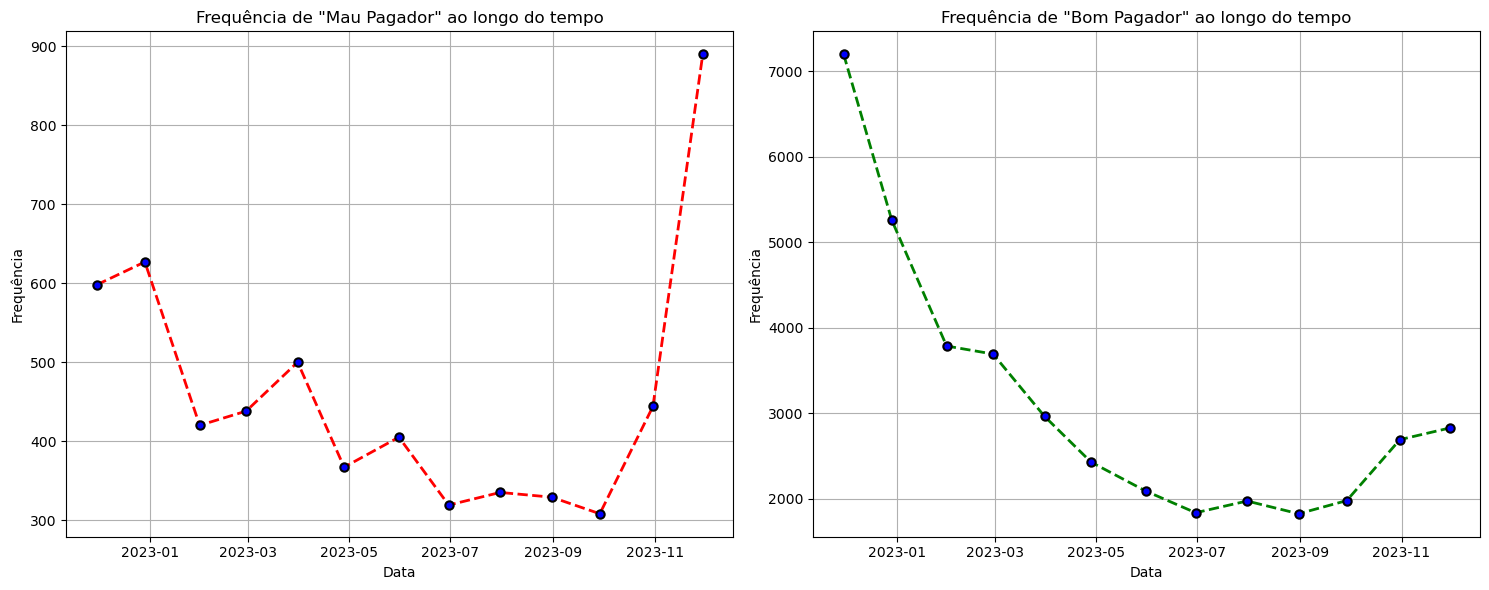

In [384]:
import matplotlib.pyplot as plt

# Convertendo a coluna 'REF_DATE' para o formato de data
df['REF_DATE'] = pd.to_datetime(df['REF_DATE'])

# Agrupando os dados por 'REF_DATE' e contando a frequência de 'Mau Pagador' e 'Bom Pagador'
frequencia_mau_pagador = df[df['alvo_label'] == 'Mau Pagador'].groupby('REF_DATE').size()
frequencia_bom_pagador = df[df['alvo_label'] == 'Bom Pagador'].groupby('REF_DATE').size()

# Criando uma figura com dois subgráficos (lado a lado)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Gráfico de "Mau Pagador"
axes[0].plot(frequencia_mau_pagador, color='red')
axes[0].set_title('Frequência de "Mau Pagador" ao longo do tempo')
axes[0].set_xlabel('Data')
axes[0].set_ylabel('Frequência')
axes[0].grid(True)

# Gráfico de "Bom Pagador"
axes[1].plot(frequencia_bom_pagador, color='green')
axes[1].set_title('Frequência de "Bom Pagador" ao longo do tempo')
axes[1].set_xlabel('Data')
axes[1].set_ylabel('Frequência')
axes[1].grid(True)

plt.tight_layout()
plt.show()

### Preparação para o One-Hot-Encoder

In [385]:
df = df.drop(columns=['REF_DATE','alvo_label'])

In [386]:
# Agrupando dados limpos que são do tipo objeto
cols_clear_obj = []
for col in df.columns.tolist():
    if df[col].dtype == 'object':
        cols_clear_obj.append(col)

### Fazendo One-Hot-Encoder

In [388]:
ohe = OneHotEncoder()

feature_arry = ohe.fit_transform(df[cols_clear_obj]).toarray()

feature_labels = np.concatenate(ohe.categories_).ravel()

features = pd.DataFrame(feature_arry, columns = feature_labels)
df = pd.concat([df, features], axis = 1)
df = df.drop(columns=cols_clear_obj)

df.head()

,index,alvo,DIAS_ATRASO,col_4,col_6,col_7,col_9,col_10,col_11,col_13,col_14,col_15,col_16,col_18,col_19,col_20,col_22,col_23,col_24,col_25,col_26,col_27,col_28,col_29,col_30,col_31,col_32,col_48,col_49,col_50,col_51,col_52,col_53,col_54,col_55,col_56,col_57,col_58,col_59,col_60,col_61,col_62,col_63,col_64,col_65,col_66,col_67,col_68,col_69,col_70,col_77,col_78,col_87,col_88,col_89,col_91,col_92,col_93,col_94,col_95,col_97,col_98,col_99,col_100,col_101,col_102,col_105,col_106,col_107,col_108,col_109,col_110,col_111,col_112,col_115,col_123,col_124,col_125,col_126,col_127,col_128,col_129,col_130,col_131,col_132,col_133,col_134,col_135,col_136,col_137,col_141,col_148,col_149,col_150,col_152,col_153,col_155,col_157,col_159,col_161,col_164,col_165,col_166,col_167,col_169,col_170,col_173,col_174,col_175,col_176,col_177,col_179,col_182,col_183,col_187,col_188,col_189,col_190,col_191,col_192,col_193,col_197,col_198,col_199,APROV,NOVASOLIC,SOLICMESMOLOCAL,APROV_1,NOVASOLIC_1,SOLICMESMOLOCAL_1,A,B,C,D,E,F,G,H,I,INDEFINIDO,J,K,A,B,C,D,E,F,G,H,I,INDEFINIDO,J,K,A,B,C,D,E,F,G,H,I,INDEFINIDO,J,K,A,B,C,D,E,F,G,H,I,INDEFINIDO,J,K,A,B,C,D,E,F,G,H,I,INDEFINIDO,J,K,A,B,C,D,E,F,G,H,I,INDEFINIDO,J,K,A,B,C,D,E,F,G,H,I,INDEFINIDO,J,K,A,B,C,D,E,F,G,H,I,INDEFINIDO,J,K,ACELERANDO,DESACELERANDO,INDEFINIDO,ACELERANDO,DESACELERANDO,INDEFINIDO,ACELERANDO,DESACELERANDO,INDEFINIDO,ALTA,BAIXA,MEDIA,SEM APROVACAO,SEM PASSAGEM,ALTA,BAIXA,MEDIA,SEM APROVACAO,SEM PASSAGEM,ALTA,BAIXA,MEDIA,SEM APROVACAO,SEM PASSAGEM,ALTA,BAIXA,MEDIA,SEM APROVACAO,SEM PASSAGEM,ALTA,BAIXA,MEDIA,SEM APROVACAO,SEM PASSAGEM,BANCOS,CREDITO,FINANCEIRAS,INDEFINIDO,VAREJO,1/2 A 1 SM,10 A 20 SM,2 A 4 SM,4 A 10 SM,ACIMA DE 20 SM,ATE 1/2 SM,ATE 2 SM,"DE 1 A 1,5 SM","DE 1,5 A 2 SM",INDEFINIDO,SEM INFORMACAO,ANALFABETO,DOUTORADO COMPLETO,ENSINO MEDIO COMPLETO,FUNDAMENTAL COMPLETO,FUNDAMENTAL INCOMPLETO,INDEFINIDO,MEDIO COMPLETO,MEDIO INCOMPLETO,MESTRADO COMPLETO,PRIMARIO COMPLETO,PRIMARIO INCOMPLETO,SUPERIOR COMPLETO,SUPERIOR INCOMPLETO,ALTO,BAIXO,BASICO,INDEFINIDO,MEDIO,MUITO ALTO,A,B,C,D,E,INDEFINIDO,60 ANOS OU MAIS,ATE 24 ANOS,DE 25 A 39 ANOS,DE 40 A 59 ANOS,INDEFINIDO,BB+,INDEFINIDO,X,Y,Z,A,B,C,D,E,INDEFINIDO,ALTO,BAIXO,MEDIO,MUITO ALTO,A,A+,A-,B,B+,B-,C,C+,C-,D,D+,D-,E,E+,E-,INDEFINIDO,INDEFINIDO,RURAL,URBANO,URBANO MODERADO,CENTRO-OESTE,INDEFINIDO,NORDESTE,NORTE,SUDESTE,SUL
0,0,0,52,2461.11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,2,0.00,0.00,2.00,2.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0,1,1,1,1,0,0,0,0,0,1,0,0,0,0,1,1,7,44.65,7.65,44.65,7.65,18.50,4,0,0,0,7,4,0,0,0,7,6,0,0,0,9,0.00,1,0,44.65,0,0,1,0,0,0,0,0,0,0.00,0.00,0,0,1.00,0,0,1,0,0,0,0,0,0,0,0,0,2,3.00,-1.00,1.00,1,1,0,0,0,0,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00
1,1,0,37,4674.50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00,0.00,0.00,0.00,2.00,0.00,0.00,1,1,1

In [389]:
df.shape

(46522, 347)

In [390]:
correlations = df.corr()

C:\Users\ADM\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


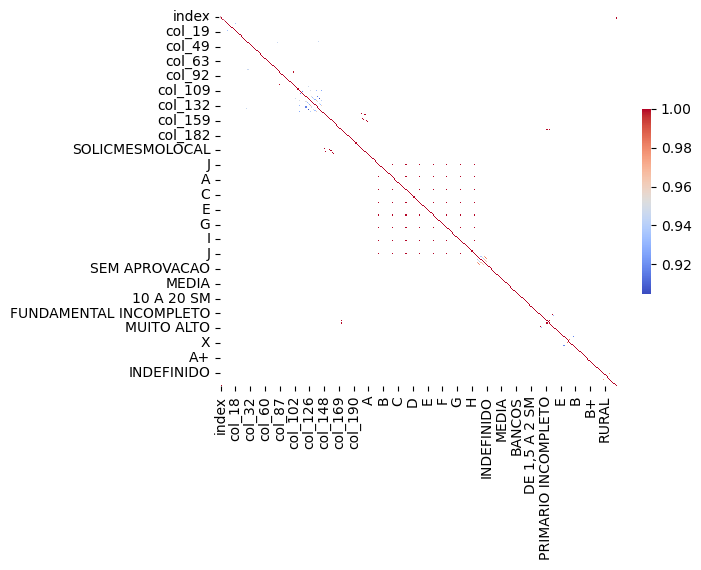

In [194]:
mask = (correlations >= 0.9)

sns.heatmap(correlations, mask=~mask, annot=True, cmap='coolwarm', fmt='.2f', cbar_kws={"shrink": .5})
plt.show()

# Modelo - Regressão Logistica

In [436]:
# Define lista de hiperparâmetros
tuned_params_v1 = {'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000], 
                   'penalty': ['l1','l2'],
                   'solver': ['liblinear', 'saga']}

In [437]:
# Criaremos o modelo com GridSearch 
modelo_v1 = GridSearchCV(LogisticRegression(), 
                         tuned_params_v1, 
                         scoring = 'roc_auc', 
                         n_jobs = -1)

In [438]:
X = df.drop('alvo', axis=1)
y = df['alvo']

In [439]:
# Separando Dados para testes e treinos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [490]:
# Verificando a distribuição

print('Treino ->', y_train.value_counts())
print('Teste ->', y_test.value_counts())

Treino -> alvo
0    32402
1     4815
Name: count, dtype: int64
Teste -> alvo
0    8140
1    1165
Name: count, dtype: int64


In [478]:
# Treinamento do Modelo junto com o tempo em Segundos de duração para treinamento

import time

start_time = time.time()

modelo_v1.fit(X_train, y_train)

end_time = time.time()

print(f"Training time: {end_time - start_time :.2f} seconds")

Training time: 288.89 seconds


In [508]:
# Selecionamos o melhor modelo
modelo_v1.best_estimator_

LogisticRegression(C=0.1, penalty='l1', solver='liblinear')

In [509]:
# Previsões com dados de teste
y_pred_v1 = modelo_v1.predict(X_test)

In [510]:
# Mostra as 10 primeiras previsões
y_pred_v1[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [511]:
# Obtemos as previsões no formato de probabilidade para cada classe
y_pred_proba = modelo_v1.predict_proba(X_test)

In [512]:
# Mostra as 10 primeiras previsões
y_pred_proba[:10]

array([[0.92433053, 0.07566947],
       [0.86833889, 0.13166111],
       [0.8532751 , 0.1467249 ],
       [0.88138149, 0.11861851],
       [0.90907418, 0.09092582],
       [0.87208948, 0.12791052],
       [0.84392909, 0.15607091],
       [0.92369744, 0.07630256],
       [0.91502026, 0.08497974],
       [0.89374591, 0.10625409]])

In [513]:
# Obtemos as previsões no formato de probabilidade filtrando para a classe positiva
# Precisamos disso para calcula a Curva ROC
y_pred_proba = modelo_v1.predict_proba(X_test)[:,1]

In [514]:
# Mostra as 10 primeiras previsões
y_pred_proba[:10]

array([0.07566947, 0.13166111, 0.1467249 , 0.11861851, 0.09092582,
       0.12791052, 0.15607091, 0.07630256, 0.08497974, 0.10625409])

In [515]:
print('Relatório de Classificação:')
print(classification_report(y_test, y_pred))

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.87      1.00      0.93      8140
           1       0.00      0.00      0.00      1165

    accuracy                           0.87      9305
   macro avg       0.44      0.50      0.47      9305
weighted avg       0.77      0.87      0.82      9305



C:\Users\ADM\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ADM\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ADM\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


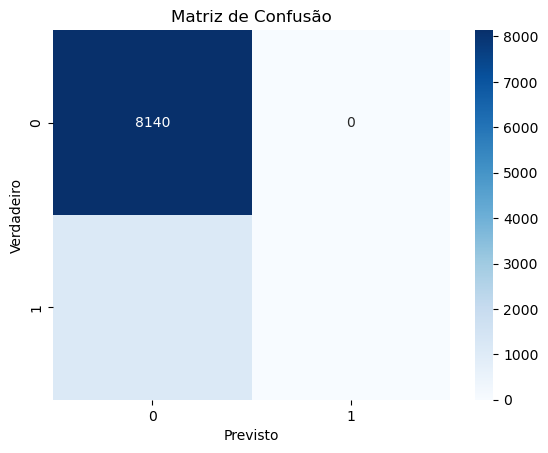

In [516]:
# Matriz de confusão
confusion_matrix(y_test, y_pred)

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusão')
plt.xlabel('Previsto')
plt.ylabel('Verdadeiro')
plt.show()

In [517]:
# Extraindo cada valor da CM
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print(tn, fp, fn, tp)

8140 0 1165 0


In [518]:
# Calcula a métrica global AUC (Area Under The Curve) com dados reais e previsões em teste
roc_auc = roc_auc_score(y_test, y_pred)
print(roc_auc)

0.5


In [519]:
fpr_v1, tpr_v1, thresholds = roc_curve(y_test, y_pred_proba_v1)

In [520]:
# AUC em teste
auc_v1 = auc(fpr_v1, tpr_v1)
print(auc_v1)

0.5641963071147622


In [521]:
# Acurácia em teste
acuracia_v1 = accuracy_score(y_test, y_pred_v1)
print(acuracia_v1)

0.8747984954325632


<Axes: >

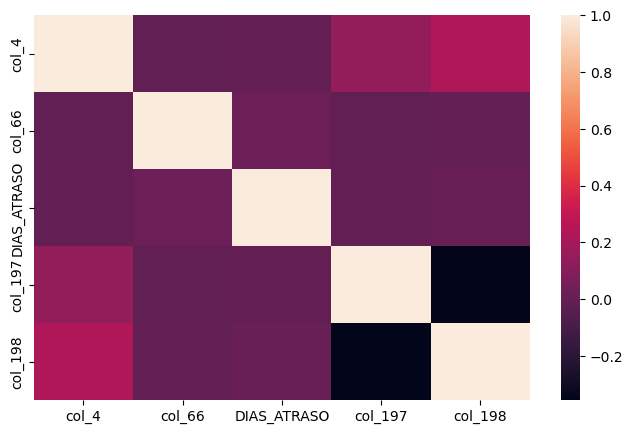

In [452]:
# modelo de criação de correlograma
dados = df[['col_4','col_66', 'DIAS_ATRASO','col_197','col_198']]
mask = dados.corr()
plt.figure(figsize=(8, 5))
sns.heatmap(dados.corr())

In [57]:
def viz(col):
    print(df[col].value_counts())
    print(df[col].isnull().sum())